## Power balanced projection methods for time-continuous dynamic simulations

### 1 - Legendre polynomials basis

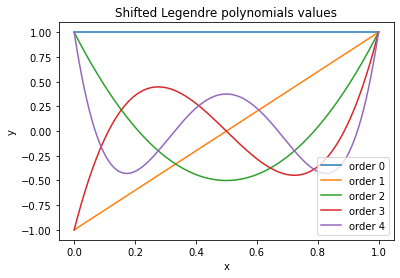

In [2]:
x = np.linspace(0,1,500)
hp.plotLPolys(x, 4)

Here, we test the quadrature integration procedure and try to obtain the same results as the one page 145 of Remy Muller's thesis. 

1 - Results for $f(x) = e^{ax}-1$ with $a=3$.

In [3]:
alpha = 3
x0 = -1
x1 = 1

#Initialization of the class up to order 100
max_order = 100
polysLeg = Leg.PolyLegendre(max_order)

#Creation of function f(x(t))
def g(t, x0, x1):
    return x0 + t*(x1-x0)

def f(x, alpha):
    return np.exp(alpha*x) - 1

def fg(t, alpha, x0 = -1, x1 = 1):
    return f(g(t, x0, x1), alpha)

#Function to compute the theoretical integral value
def analyticIntegration(alpha, x0, x1):
    return (np.exp(alpha*x1) - np.exp(alpha*x0)) / (alpha*(x1-x0)) -1

fgToPass = lambda t : fg(t, alpha, x0, x1)

approxError = polysLeg.quadratureConvergence(fgToPass, analyticIntegration(alpha, x0, x1))
legSpectrum = polysLeg.legendreSpectrum(fgToPass)

Text(0.5, 1.0, 'Legendre spectrum')

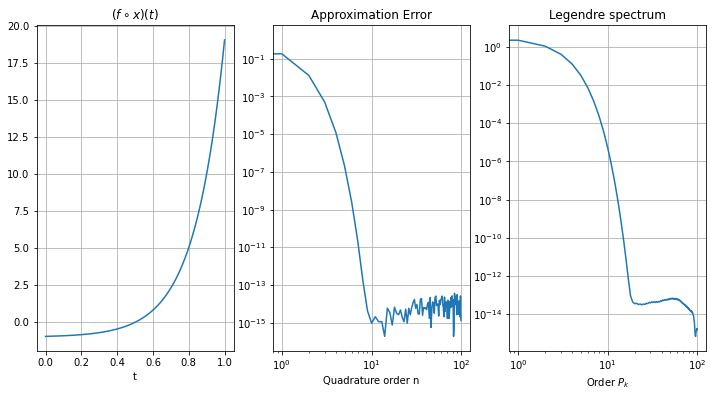

In [4]:
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.grid(True)
x = np.linspace(0,1,500)
plt.plot(x, fgToPass(x))
plt.xlabel('t')
plt.title('$(f \circ x)(t)$')

plt.subplot(1,3,2)
plt.grid(True)
plt.loglog(approxError)
plt.xlabel('Quadrature order n')
plt.title('Approximation Error')

plt.subplot(1,3,3)
plt.grid(True)
plt.loglog(legSpectrum)
plt.xlabel('Order $P_k$')
plt.title('Legendre spectrum')

2 - Results for $f(x) = max(ax,0)$ and $a = 3$.

In [5]:
alpha = 3
x0 = -1
x1 = 1

#Initialization of the class up to order 100
max_order = 300
polysLeg = Leg.PolyLegendre(max_order)

#Creation of function f(x(t))
def g(t, x0, x1):
    return x0 + t*(x1-x0)

def f(x, alpha):
    return (x>0)*x*alpha

def fg(t, alpha, x0 = -1, x1 = 1):
    return f(g(t, x0, x1), alpha)

#Function to compute the theoretical integral value
def analyticIntegration(alpha, x0, x1):
    return alpha*(x1/2 - (x1-x0)/8)

fgToPass = lambda t : fg(t, alpha, x0, x1)

approxError = polysLeg.quadratureConvergence(fgToPass, analyticIntegration(alpha, x0, x1))
legSpectrum = polysLeg.legendreSpectrum(fgToPass)

Text(0.5, 1.0, 'Legendre spectrum')

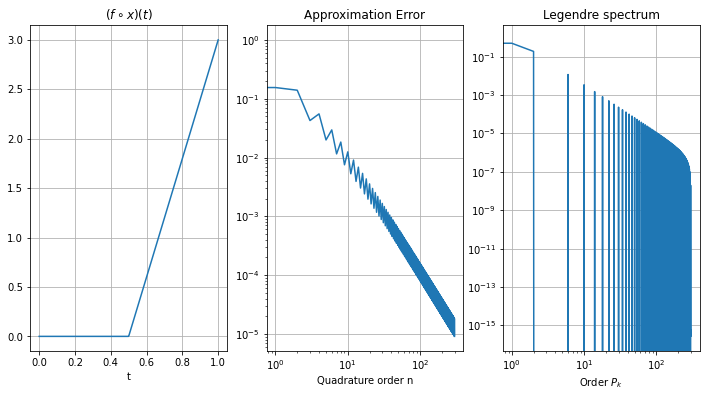

In [6]:
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.grid(True)
x = np.linspace(0,1,500)
plt.plot(x, fgToPass(x))
plt.xlabel('t')
plt.title('$(f \circ x)(t)$')

plt.subplot(1,3,2)
plt.grid(True)
plt.loglog(approxError)
plt.xlabel('Quadrature order n')
plt.title('Approximation Error')

plt.subplot(1,3,3)
plt.grid(True)
plt.loglog(legSpectrum)
plt.xlabel('Order $P_k$')
plt.title('Legendre spectrum')

## RPM solver for PHS systems

Note syntaxe gradient et hessian à passer au solveur : 
 - gradient doit etre une fonction acceptant un array de dimensions [NStates, n] où le gradient doit être estimé en n différent points à l'aide de l'état donné. La fonction doit retourner un array de dimension [NStates, n].
 - hessian doit etre une fonction acceptant un array de dimensions [NStates, n]  où les dérivées partielles des gradients éstimés aux états correpondant aux n états données par rapport aux variables d'états sont calculées. 
 La fonction doit retourner un array de dimension [NStates, NStates, n]

In [1]:
# Imports
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import rpm_module as rpm
import sympy as sp

In [2]:
#Problem data

# Interconnexion matrix
S = np.array([[0, -1], 
                [1, 0]])

# Hamiltonian
q, phi, C0, phi0 = sp.symbols('q, phi, C_0, phi_0', real=True)
states = [q,phi]
def hamiltonian(q,phi):
    return q**4 / (2*C0) + phi**2 / (2*phi0)

H = hamiltonian(q,phi)
H = H.subs(C0, 1)
H = H.subs(phi0, 1)

"""
def gradients(x):
    grad1 = x[0] / C0
    grad2 = x[1] * L0
    return np.array((grad1, grad2))

def hessian(x):
    NPoints = x.shape[1]
    hessian = np.zeros((2,2,NPoints))
    hessian[0,0,:] = np.ones(NPoints) / C0 
    hessian[1,1,:] = np.ones(NPoints) * L0
    return hessian"""

#Solver parameters
p_order = 2
k_order  = 1
sr = 10
stepSize = 1/sr
quadOrder = 50
epsilon = 10**(-15)
maxIter = 100

In [3]:
solver = rpm.RPMSolverPHS(S, H, states, p_order, k_order, stepSize,
    quadOrder, epsilon, maxIter)

(100, 2)


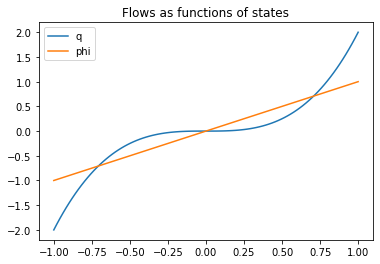

In [4]:
x = np.array([np.linspace(-1, 1, 100), np.linspace(-1, 1, 100)]).T
rpm.hp.plot_gradients(solver, np.linspace(-1, 1, 100), ["q", "phi"])

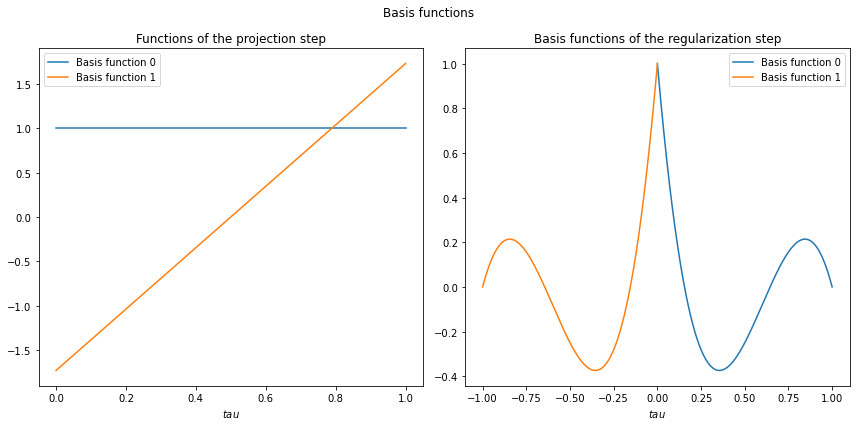

In [5]:
rpm.hp.plot_basis(solver)

In [6]:
init = np.ones(len(S), dtype= np.float64)
duration = 10
t = np.linspace(0, duration, int(duration/stepSize))
x, dx = solver.simulate(init, duration)

Mean number of NR iterations : 3.6122448979591835


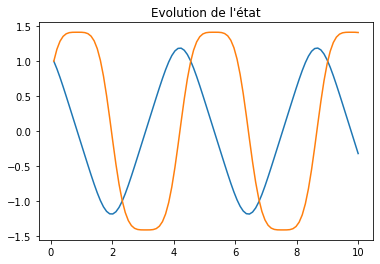

In [7]:
plt.figure()
plt.title("Evolution de l'état")
plt.plot(t[1:],x)

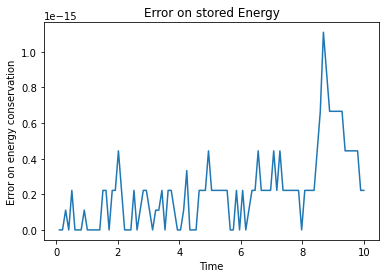

In [8]:
rpm.hp.plot_error_energy(solver, x, t)

## Input reconstruction : shifted linear interpolation

In [10]:
from rpm_module.dac_adc.input_resonstruction import *

In [50]:
sr = 1
DAC = inputReconstruction(sr)


In [51]:
duration = 200
t = np.linspace(0,duration,int(duration*sr))

f0 = 0.1
inputSignal = np.sin(2*np.pi*f0*t)

analogSignal = DAC.DAC(inputSignal)

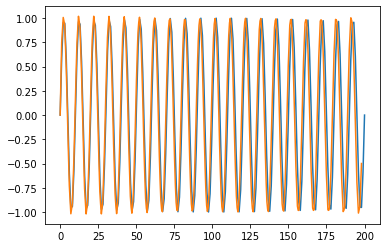

In [53]:
plt.plot(t, inputSignal)
t2 = np.linspace(0,duration, int(duration*sr*2))
analogRepresentation = analogSignal(t2)
plt.plot(t2[:len(analogRepresentation)], analogRepresentation)

In [17]:
a = np.arange(10)
b = a[a>5]

In [18]:
b

array([6, 7, 8, 9])

In [3]:
class truc():
    def __init__(self):
        self.a = 5

In [4]:
def f(x):
    return x.a

b = truc()
f(b)

5

In [40]:
a = np.dot((1+np.arange(2)),np.stack([np.eye(5), np.eye(5)]))

ValueError: shapes (2,) and (2,5,5) not aligned: 2 (dim 0) != 5 (dim 1)

In [38]:
np.outer()

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.])

In [71]:
a = np.ones((4,4))
b = np.arange(4)

NameError: name 'np' is not defined

In [2]:
import scipy.special as spe
import numpy as np

a = spe.legendre(3)
np.flip(a)

array([ 0. , -1.5,  0. ,  2.5])

In [5]:
a = np.ones((0,5))
a[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [6]:
np.outer(a, np.ones(4))

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.]])